In [1]:
import sys
sys.path.append('scripts')
from Retrosynthesis import LocalRetro
import torch

In [2]:
# Load the model and necessary files for prediction decoding
dataset = 'USPTO_50K' # USPTO_MIT or USPTO_50K
device = torch.device('cpu') # cpu or cuda:0
model_path = 'models/LocalRetro_%s.pth' % dataset
config_path = 'data/configs/default_config.json'
data_dir = 'data/%s' % dataset

args = {'data_dir': data_dir, 'model_path': model_path, 'config_path': config_path, 'device': device}
localretro = LocalRetro(args)

Parameters of loaded LocalRetro:
{'attention_heads': 8, 'attention_layers': 1, 'batch_size': 16, 'edge_hidden_feats': 64, 'node_out_feats': 320, 'num_step_message_passing': 6, 'activation': 'gelu', 'AtomTemplate_n': 124, 'BondTemplate_n': 548, 'in_node_feats': 80, 'in_edge_feats': 13}


In [3]:
target_smiles = {'Lenalidomide': 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N',
                 'Salmeterol': 'OCc1cc(ccc1O)[C@H](O)CNCCCCCCOCCCCc2ccccc2',
                 '5-HT6 receptor ligand': 'O=S(=O)(Nc4cc2CCC1(CCC1)Oc2c(N3CCNCC3)c4)c5ccccc5F', 
                 'DDR1_037': 'O=C(Nc4cccc(C(=O)N3CCN(c1ccnc2[nH]ccc12)C3)c4)c5cccc(C(F)(F)F)c5',
                 'DDR1_032': 'Cc3cc2[nH]c(c1cc(CN(C)C)cc(C(F)(F)F)c1)nc2cc3C#Cc4cncnc4'}

,SMILES,Predicted site,Local reaction template,Score,Molecule
0,O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N,None,None,NaN,
1,O=C1CCC(N2Cc3c(cccc3[N+](=O)[O-])C2=O)C(=O)N1,18,([N:1])>>(O=[N:1]-[O-]),0.807322,
2,COC(=O)CCC(C(N)=O)N1Cc2c(N)cccc2C1=O,"(2, 3)",([N:1]-[C:2])>>([N:1].C-O-[C:2]),0.083776,
3,CCOC(=O)CCC(C(N)=O)N1Cc2c(N)cccc2C1=O,"(2, 3)",([N:1]-[C:2])>>([N:1].C-C-O-[C:2]),0.054795,
4,CC(C)(C)OC(=O)Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,18,([N:1])>>(C-C(-C)(-C)-O-C(=O)-[N:1]),0.050667,
5,COC(=O)C(CCC(N)=O)N1Cc2c(N)cccc2C1=O,"(2, 1)",([N:1]-[C:2])>>([N:1].C-O-[C:2]),0.045808,
6,NC(=O)C(CCC(=O)O)N1Cc2c(N)cccc2C1=O,"(2, 3)",([N:1]-[C:2])>>([N:1].O-[C:2]),0.033101,
7,CCOC(=O)C(CCC(N)=O)N1Cc2c(N)cccc2C1=O,"(2, 1)",([N:1]-[C:2])>>([N:1].C-C-O-[C:2]),0.026317,
8,NC(=O)CCC(C(=O)O)N1Cc2c(N)cccc2C1=O,"(2, 1)",([N:1]-[C:2])>>([N:1].O-[C:2]),0.014991,
9,CC(=O)Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,18,([N:1])>>(C-C(=O)-[N:1]),0.011636,

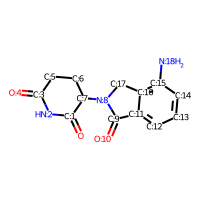
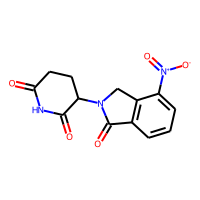
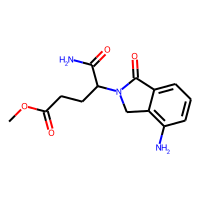
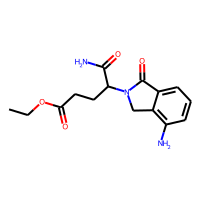
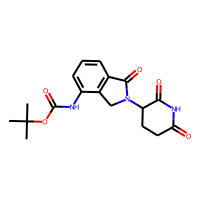
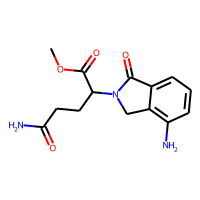
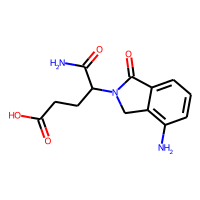
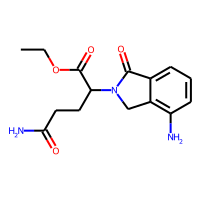
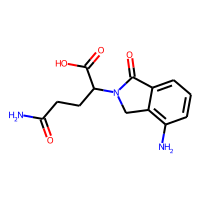
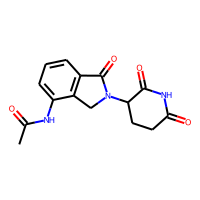
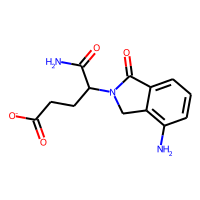

In [4]:
smiles = target_smiles['Lenalidomide']
localretro.retrosnythesis(smiles)